In [1]:
import tensorflow as tf
from keras import layers, models, datasets

import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Loads the data of CIFAR10
train_images , test_images = train_images / 255.0, test_images / 255.0 

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog','frog','horse','ship','truck']


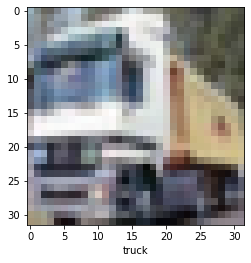

In [3]:
IMG_INDEX = 1

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()
#Plotting training data img 

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(64 , (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64 , (3,3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128 , (5,5), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128 , (5,5), activation='relu',padding='same'))

2022-07-04 12:03:25.373168: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-04 12:03:25.374041: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [6]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [8]:
model.compile(
    optimizer = 'Adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs=25, validation_data=(test_images, test_labels))

Epoch 1/25


2022-07-04 12:03:27.443286: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-04 12:03:27.903060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.4987 - accuracy: 0.4502

2022-07-04 12:04:06.002538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 42s 26ms/step - loss: 1.4987 - accuracy: 0.4502 - val_loss: 1.1397 - val_accuracy: 0.5948
Epoch 2/25
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0219 - accuracy: 0.6345 - val_loss: 0.9402 - val_accuracy: 0.6657
Epoch 3/25
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8255 - accuracy: 0.7073 - val_loss: 0.8362 - val_accuracy: 0.7062
Epoch 4/25
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6958 - accuracy: 0.7556 - val_loss: 0.8209 - val_accuracy: 0.7128
Epoch 5/25
1563/1563 [==============================] - 42s 27ms/step - loss: 0.5934 - accuracy: 0.7931 - val_loss: 0.8428 - val_accuracy: 0.7135
Epoch 6/25
1563/1563 [==============================] - 41s 26ms/step - loss: 0.5025 - accuracy: 0.8224 - val_loss: 0.8273 - val_accuracy: 0.7255
Epoch 7/25
1563/1563 [==============================] - 43s 27ms/step - loss: 0.4333 - accuracy: 0.8467 - val_loss: 0.8290 - val_accura

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 1.4218 - accuracy: 0.7317 - 3s/epoch - 10ms/step
0.73170006275177


313/313 [==============================] - 2s 8ms/step
ship


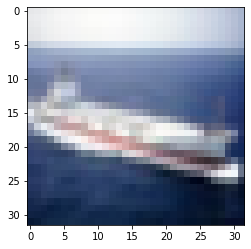

In [13]:
import numpy as np

TEST_IMG = 54

predictions = model.predict(test_images)
plt.imshow(test_images[TEST_IMG])
print(class_names[np.argmax(predictions[TEST_IMG])])